In [2]:
import pandas as pd
from mplsoccer import Pitch
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv("Data/Duke/DukeShots.csv").reset_index()

In [4]:
data

,index,numOpportunity,Event,Result,Start Pos,End Pos,Team
0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.0,Throw-in,Successful,"[33.04761904761903, 0.3809523809523796]","[22.571428571428562, 11.047619047619051]",Duke
2,2,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.0,Pass,Successful,"[17.047619047619037, 12.38095238095238]","[9.619047619047606, 21.14285714285714]",Duke
4,4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
142,142,13.0,Pass,Successful,"[98.76190476190476, 7.428571428571431]","[103.9047619047619, 29.904761904761912]",Duke
143,143,NaN,NaN,NaN,NaN,NaN,NaN
144,144,13.0,Pass,Successful,"[107.14285714285714, 27.42857142857143]","[113.42857142857142, 38.095238095238095]",Duke
145,145,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.dropna(inplace=True)
startX = []
startY = []
endX = []
endY = []
for i in range(data.shape[0]):
    row = data.iloc[i]
    startX.append(float(row.get("Start Pos").split(", ")[0][1:]))
    startY.append(float(row.get("Start Pos").split(", ")[1][:-1]))
    endX.append(float(row.get("End Pos").split(", ")[0][1:]))
    endY.append(float(row.get("End Pos").split(", ")[1][:-1]))
data = data.assign(startX = startX)
data =data.assign(startY = startY)
data =data.assign(endX = endX)
data =data.assign(endY = endY)
oppSide = dict()
for i in data.get("numOpportunity").unique():
    df = data[data.get("numOpportunity")==i]
    endX = df.iloc[-1].get("endX")
    if endX >60:
        side = "right"
    elif endX<=60:
        side = "left"
    oppSide[i]=side
data = data.assign(Side = data.get("numOpportunity").apply(lambda num:oppSide[num]))
rightOpportunities = data[data.get("Side") == "right"]
rightOpportunities = rightOpportunities.assign(startX = 120-rightOpportunities.get("startX"))
rightOpportunities = rightOpportunities.assign(startY = 80-rightOpportunities.get("startY"))
rightOpportunities = rightOpportunities.assign(endX = 120-rightOpportunities.get("endX"))
rightOpportunities = rightOpportunities.assign(endY = 80-rightOpportunities.get("endY"))
leftOpportunities = data[data.get("Side") == "left"]
opportunities = pd.merge(rightOpportunities, leftOpportunities,how = "outer")
opportunities

,index,numOpportunity,Event,Result,Start Pos,End Pos,Team,startX,startY,endX,endY,Side
0,1,0.0,Throw-in,Successful,"[33.04761904761903, 0.3809523809523796]","[22.571428571428562, 11.047619047619051]",Duke,33.047619,0.380952,22.571429,11.047619,left
1,3,0.0,Pass,Successful,"[17.047619047619037, 12.38095238095238]","[9.619047619047606, 21.14285714285714]",Duke,17.047619,12.380952,9.619048,21.142857,left
2,5,0.0,Pass,Successful,"[1.4285714285714164, 24.0]","[7.142857142857132, 47.80952380952381]",Duke,1.428571,24.000000,7.142857,47.809524,left
3,7,0.0,Shot(foot),Unsuccessful,"[8.666666666666657, 48.19047619047619]","[0.857142857142847, 49.904761904761905]",Duke,8.666667,48.190476,0.857143,49.904762,left
4,9,1.0,Tackle,Successful,"[30.952380952380942, 62.857142857142854]","[-1, -1]",Duke,30.952381,62.857143,-1.000000,-1.000000,left
...,...,...,...,...,...,...,...,...,...,...,...,...
69,138,13.0,Tackle,Successful,"[85.8095238095238, 23.80952380952381]","[-1, -1]",Duke,34.190476,56.190476,121.000000,81.000000,right
70,140,13.0,Pass,Successful,"[84.28571428571428, 22.85714285714286]","[94.38095238095238, 3.80952380952381]",Duke,35.714286,57.142857,25.619048,76.190476,right
71,142,13.0,Pass,Successful,"[98.76190476190476, 7.428571428571431]","[103.9047619047619, 29.904761904761912]",Duke,21.238095,72.571429,16.095238,50.095238,right
72,144,13.0,Pass,Successful,"[107.14285714285714, 27.42857142857143]","[113.42857142857142, 38.095238095238095]",Duke,12.857143,52.571429,6.571429,41.904762,right


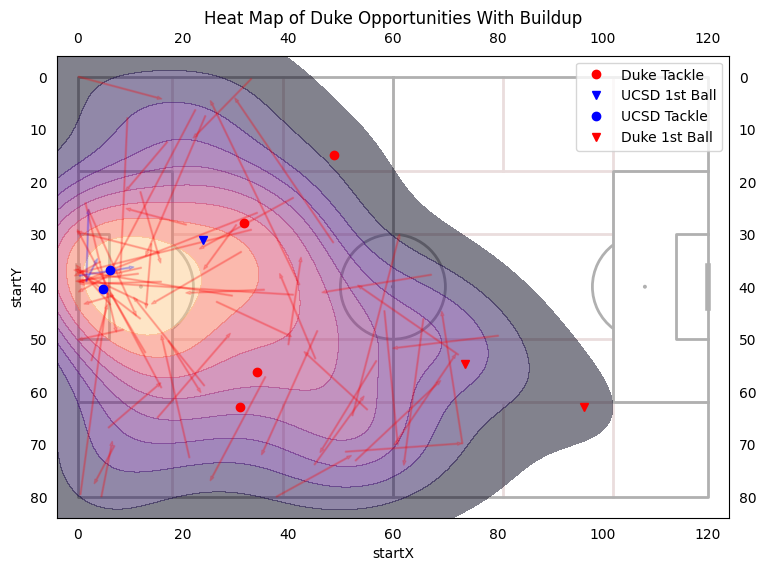

In [8]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=opportunities.get("startX"),y=opportunities.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(opportunities.shape[0]):
    row = opportunities.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="1st Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2,color = color)
plt.title("Heat Map of Duke Opportunities With Buildup")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())

In [9]:
origins =[]
for i in range(int(opportunities.get("numOpportunity").max())+1):
    limited = opportunities[opportunities.get("numOpportunity") == i].iloc[0]
    origins.append(limited)
origins = pd.DataFrame(origins)

In [10]:
origins

,index,numOpportunity,Event,Result,Start Pos,End Pos,Team,startX,startY,endX,endY,Side
0,1,0.0,Throw-in,Successful,"[33.04761904761903, 0.3809523809523796]","[22.571428571428562, 11.047619047619051]",Duke,33.047619,0.380952,22.571429,11.047619,left
4,9,1.0,Tackle,Successful,"[30.952380952380942, 62.857142857142854]","[-1, -1]",Duke,30.952381,62.857143,-1.000000,-1.000000,left
7,15,2.0,1st Ball,Successful,"[23.90476190476189, 31.04761904761905]","[39.33333333333332, 24.0]",UCSD,23.904762,31.047619,39.333333,24.000000,left
15,31,3.0,Throw-in,Successful,"[37.8095238095238, 80.0]","[51.33333333333332, 72.57142857142857]",Duke,37.809524,80.000000,51.333333,72.571429,left
27,55,4.0,Set Piece,Successful,"[0.0952380952380878, 0.0]","[15.142857142857132, 4.0]",Duke,0.095238,0.000000,15.142857,4.000000,left
31,63,5.0,Tackle,Successful,"[31.7142857142857, 27.80952380952381]","[-1, -1]",Duke,31.714286,27.809524,-1.000000,-1.000000,left
35,71,6.0,Throw-in,Successful,"[4.476190476190467, 80.0]","[6.3809523809523725, 70.28571428571428]",Duke,4.476190,80.000000,6.380952,70.285714,left
39,79,7.0,Set Piece,Unsuccessful,"[41.04761904761903, 41.523809523809526]","[1.2380952380952266, 39.04761904761905]",Duke,41.047619,41.523810,1.238095,39.047619,left
40,82,8.0,1st Ball,Successful,"[46.19047619047618, 25.33333333333333]","[65.8095238095238, 25.14285714285714]",Duke,73.809524,54.666667,54.190476,54.857143,right
44,89,9.0,Set Piece,Unsuccessful,"[119.52380952380952, 0.3809523809523796]","[114.19047619047618, 39.80952380952381]",Duke,0.476190,79.619048,5.809524,40.190476,right


Text(0.5, 1.0, 'Duke Shots Origin')

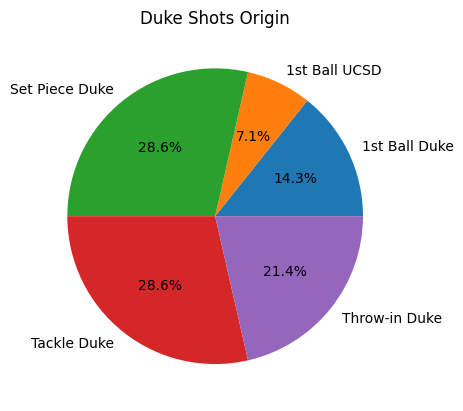

In [11]:
originCounts = origins.groupby(["Event","Team"]).count().reset_index()
labels = originCounts.get("Event") + " "+originCounts.get("Team")
plt.pie(originCounts.get("index"),labels = labels,autopct='%1.1f%%')
plt.title("Duke Shots Origin")

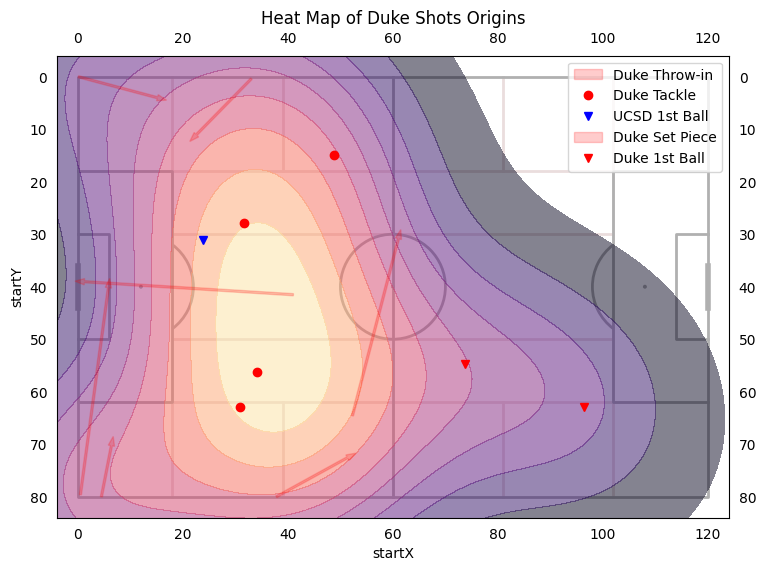

In [13]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=origins.get("startX"),y=origins.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(origins.shape[0]):
    row = origins.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="1st Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+ " "+row.get("Event"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = .2,color =color,label = team+ " "+row.get("Event"))
plt.title("Heat Map of Duke Shots Origins")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())


Text(0.5, 1.0, 'Heat Map of Duke Shots')

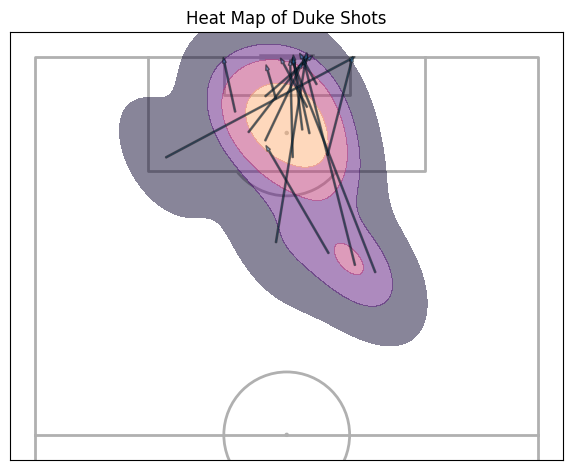

In [14]:
shots = opportunities[opportunities.get("Event").apply(lambda event: "Shot" in event)]
pitch = VerticalPitch(half=True, axis=True)
fig, ax = pitch.draw()
kde = sns.kdeplot(y=120-shots.get("startX"),x=80-shots.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 5,cmap = "magma")
for i in range(shots.shape[0]):
    row = shots.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(80-row.get("startY"),120-row.get("startX"),-1*(row.get("endY")-row.get("startY")),-1*(row.get("endX")-row.get("startX")),width = .2,alpha = .5)
plt.title("Heat Map of Duke Shots")

In [15]:
#shot assists
shotAssists = []
for i in range(1, opportunities.shape[0]):
    previous = opportunities.iloc[i-1]
    row = opportunities.iloc[i]
    if "Shot" in row.get("Event"):
        shotAssists.append([previous.get("numOpportunity"),previous.get("Game"),previous.get("Team"),previous.get("Event"),previous.get("Result"),previous.get("startX"),previous.get("startY"),previous.get("endX"),previous.get("endY"),row.get("Result")])
shotAssists = pd.DataFrame(shotAssists,columns=["numOpportunity","Game","Team","Event","Event Result","startX","startY","endX",'endY',"Shot result"])

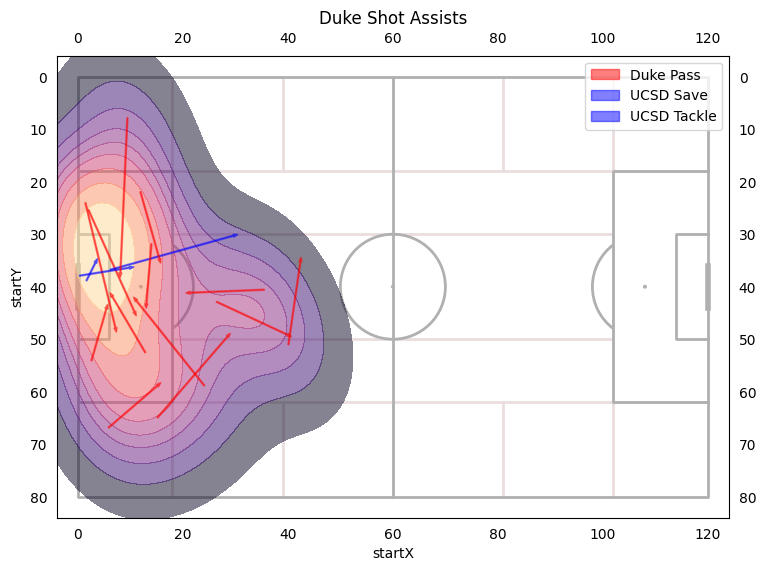

In [16]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=shotAssists.get("startX"),y=shotAssists.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")
for i in range(shotAssists.shape[0]):
    row = shotAssists.iloc[i]
    team = row.get("Team")
    if team == "Duke":
        color = "Red"
    else:
        color = "Blue"
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .5,color = color, label = team+" "+row.get("Event"))
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("Duke Shot Assists")
plt.show()

,,numOpportunity,Game,Event Result,startX,startY,endX,endY,Shot result
Event,Team,,,,,,,,
Pass,Duke,13,0,13,13,13,13,13,13
Save,UCSD,2,0,2,2,2,2,2,2
Tackle,UCSD,1,0,1,1,1,1,1,1


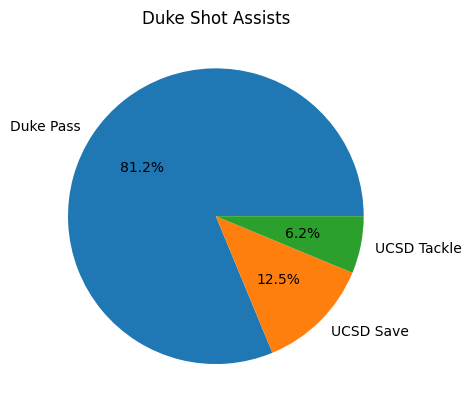

In [19]:
counts = shotAssists.groupby(["Event","Team"]).count()
plt.pie(counts.get("numOpportunity"),labels=["Duke Pass","UCSD Save","UCSD Tackle"],autopct='%1.1f%%')
plt.title("Duke Shot Assists")
counts